In [2]:
from community_knapsack import *
from evaluation import evaluation
import random

In [3]:
# The algorithms to use for this evaluation:
exact_algorithms = [
    PBMultiAlgorithm.MEMOIZATION,
    PBMultiAlgorithm.ILP_SOLVER
]

approximation_algorithms = [
    PBMultiAlgorithm.GREEDY,
    PBMultiAlgorithm.RATIO_GREEDY,
    PBMultiAlgorithm.BRANCH_AND_BOUND,
    PBMultiAlgorithm.SIMULATED_ANNEALING,
    PBMultiAlgorithm.GENETIC_ALGORITHM
]

#### This notebook tests the scalability of the algorithms with small costs relative to the budgets in each dimension.
---

In [4]:
# The boundaries of this evaluation:

# We test an instance with three dimensions where each budget is randomly generated
# between 10000 and 100000 and the costs of each project are randomly generated
# from 5-10%, 5-20%, 5-30%, 5-40%, 5-50%.

random.seed(181)

num_projects = 50
num_voters = 3000
dimensions = 3

min_cost_fraction = 0.01

start_max_cost_fraction = 10
end_max_cost_fraction = 50
step_max_cost_fraction = 5

budget = [random.randint(100_000, 1_000_000) for _ in range(dimensions)]

In [5]:
x_axis = list(cost/100 for cost in range(start_max_cost_fraction, end_max_cost_fraction + 1, step_max_cost_fraction))

In [6]:
problems = evaluation.generate_multi_problems(
    num_project_bounds=[(num_projects, num_projects)],
    num_voters_bounds=[(num_voters, num_voters)],
    dimension_bounds=[1],
    budget_bounds=[[[(b, b) for b in budget]]],
    cost_bounds=[[[(int(b * min_cost_fraction), int(b * curr_cost)) for bid, b in enumerate(budget)] for curr_cost in x_axis]]
)

In [14]:
problems[0].budget

[709161, 832723, 210427]

In [7]:
# Obtain the exact results for this evaluation:
exact_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=exact_algorithms,
    timeout=60,
    max_fail=-1,
    file_name='ext-tiny-cost-fractions.json',
    output=True
)

In [8]:
# Obtain the exact results for this evaluation:
approximation_results = evaluation.solve_problems(
    problem_list=problems,
    algorithms=approximation_algorithms,
    timeout=60,
    max_fail=-1,
    file_name='apx-tiny-costs-fractions.json',
    output=True
)

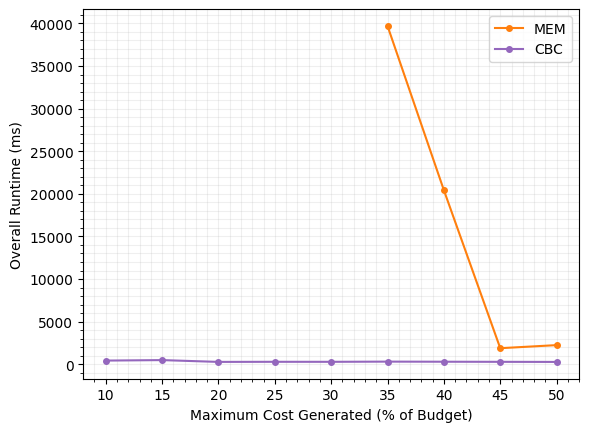

In [9]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 2),
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms)
)

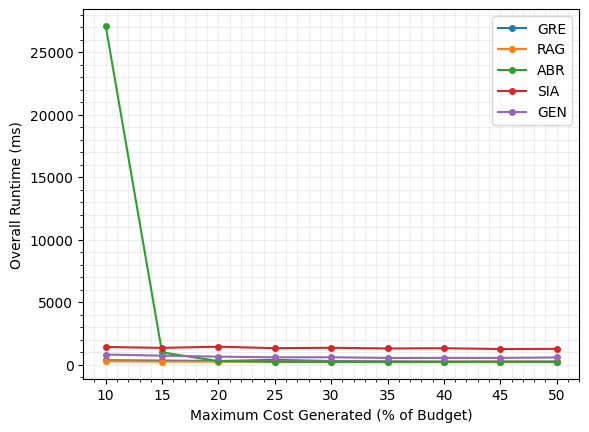

In [10]:
# Plot the exact algorithm runtimes over the problems:
evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=evaluation.get_y_axes(approximation_results, approximation_algorithms, 2),
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='Overall Runtime (ms)',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms)
)

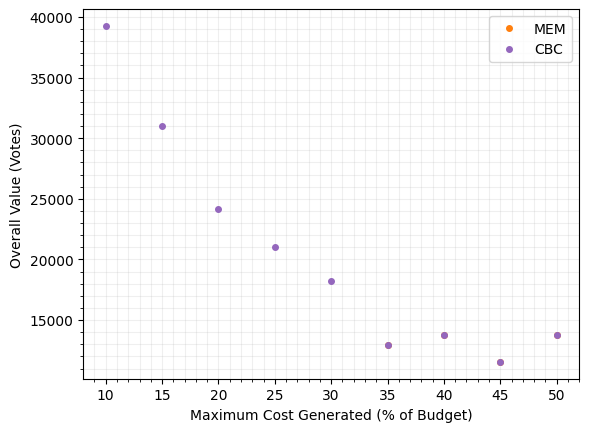

In [11]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=evaluation.get_y_axes(exact_results, exact_algorithms, 0),
    filter_x=1,
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=evaluation.get_labels(exact_algorithms),
    colors=evaluation.get_colors(exact_algorithms),
    alphas=evaluation.get_alphas(exact_algorithms),
    sizes=evaluation.get_sizes(exact_algorithms),
)

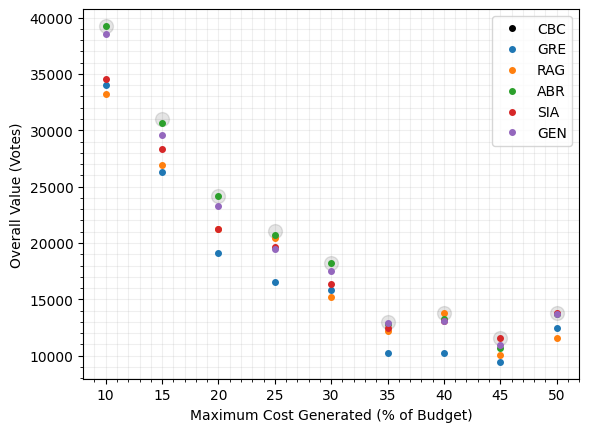

In [13]:
# Plot the approximation vs. exact algorithm values over the problems:
evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=[evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)] + evaluation.get_y_axes(approximation_results, approximation_algorithms, 0),
    filter_x=1,
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='Overall Value (Votes)',
    marker='o',
    labels=['CBC'] + evaluation.get_labels(approximation_algorithms),
    colors=['black'] + evaluation.get_colors(approximation_algorithms),
    alphas=[0.1] + evaluation.get_alphas(approximation_algorithms),
    sizes=[10] + evaluation.get_sizes(approximation_algorithms),
)

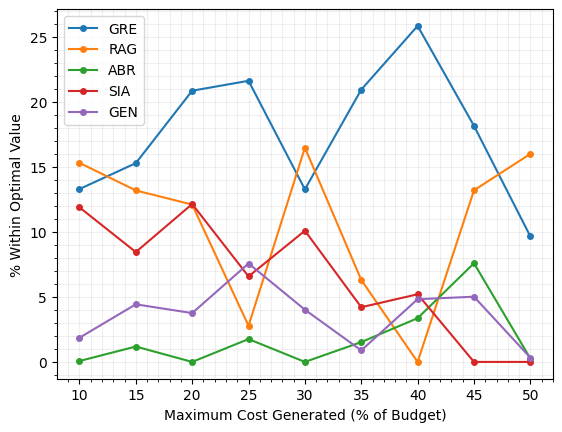

In [18]:
# Plot the approximation % of exact value over the problems:
opt_y = evaluation.get_y_axis(exact_results, PBSingleAlgorithm.ILP_SOLVER, 0)
val_y = evaluation.get_y_axes(approximation_results, approximation_algorithms, 0)

evaluation.plot_2d(
    x_axis=[x*100 for x in x_axis],
    y_axes=[
        [100 * (1 - (y / opt_y[yid])) for yid, y in enumerate(y_axis)]
        for y_axis in val_y
    ],
    x_label='Maximum Cost Generated (% of Budget)',
    y_label='% Within Optimal Value',
    labels=evaluation.get_labels(approximation_algorithms),
    colors=evaluation.get_colors(approximation_algorithms),
    alphas=evaluation.get_alphas(approximation_algorithms),
    sizes=evaluation.get_sizes(approximation_algorithms)
)